# BertaQA Anthropic Basque and English

In [1]:
import pandas as pd

def get_dataframe(model, config):
    df = pd.read_json(f"../results/{model}/bertaqa_{config}_5-shot.jsonl", lines=True)
    return df

In [2]:
df_claude3haiku_bertaqa_eu = get_dataframe("claude-3-haiku-20240307", "eu")

df_claude3haiku_bertaqa_en = get_dataframe("claude-3-haiku-20240307", "en")

df_claude3sonnet_bertaqa_eu = get_dataframe("claude-3-sonnet-20240229", "eu")

df_claude3sonnet_bertaqa_en = get_dataframe("claude-3-sonnet-20240229", "en")

df_claude3opus_bertaqa_eu = get_dataframe("claude-3-opus-20240229", "eu")

df_claude3opus_bertaqa_en = get_dataframe("claude-3-opus-20240229", "en")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dataframe_bertaqa(df):
    # add acc column 1 if correct else 0
    df["acc"] = df.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    
    mean_accuracy = df["acc"].mean()
    display((mean_accuracy* 100).round(2))
    
    
    # group by the "group" column and calculate the mean accuracy for each group
    # group attribute is in dict "doc"
    grouped = df.groupby("group")["acc"].mean()

    # group by the "difficulty" column and calculate the mean accuracy for each difficulty
    # difficulty attribute is in dict "doc"
    grouped_difficulty = df.groupby("difficulty")["acc"].mean()

    # group by the "category" column and calculate the mean accuracy for each category
    # category attribute is in dict "doc"
    grouped_category = df.groupby("category")["acc"].mean()

    # group by the "group" and "category" columns and calculate the mean accuracy for each group and category combination
    grouped_group_category = df.groupby(["category", "group"])["acc"].mean()

    # group by the "difficulty" and "category" columns and calculate the mean accuracy for each difficulty and category combination
    grouped_difficulty_category = df.groupby(["category", "difficulty"])["acc"].mean()

    # group by the "group" and "difficulty" columns and calculate the mean accuracy for each group and difficulty combination
    grouped_group_difficulty = df.groupby(["difficulty", "group"])["acc"].mean()

    # plot the results
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    display((grouped * 100).round(2))

    # grouped_difficulty.plot(kind="bar", ax=axs[0, 1], rot=0, title="Accuracy by Difficulty")
    grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    display(grouped_category)
    display(grouped_difficulty)
    
    # grouped_group_category.unstack().plot(kind="bar", ax=axs[1, 1], rot=90, title="Accuracy by Category and Group")
    
    # grouped_difficulty_category.unstack().plot(kind="bar", ax=axs[2, 0], rot=90, title="Accuracy by Difficulty and Category")
    
    # grouped_group_difficulty.unstack().plot(kind="bar", ax=axs[2, 1], rot=0, title="Accuracy by Group and Difficulty")


81.94

group
Euskal gaiak     71.91
Gai orokorrak    91.85
Name: acc, dtype: float64

category
Euskara eta literatura     0.834146
Geografia eta Historia     0.810000
Gizartea eta ohiturak      0.894378
Kirola eta aisialdia       0.799666
Kultura eta artea          0.864028
Musika eta dantza          0.684211
Zientzia eta teknologia    0.855442
Zinema eta ikuskizunak     0.814070
Name: acc, dtype: float64

difficulty
1    0.872479
2    0.802654
3    0.774121
Name: acc, dtype: float64

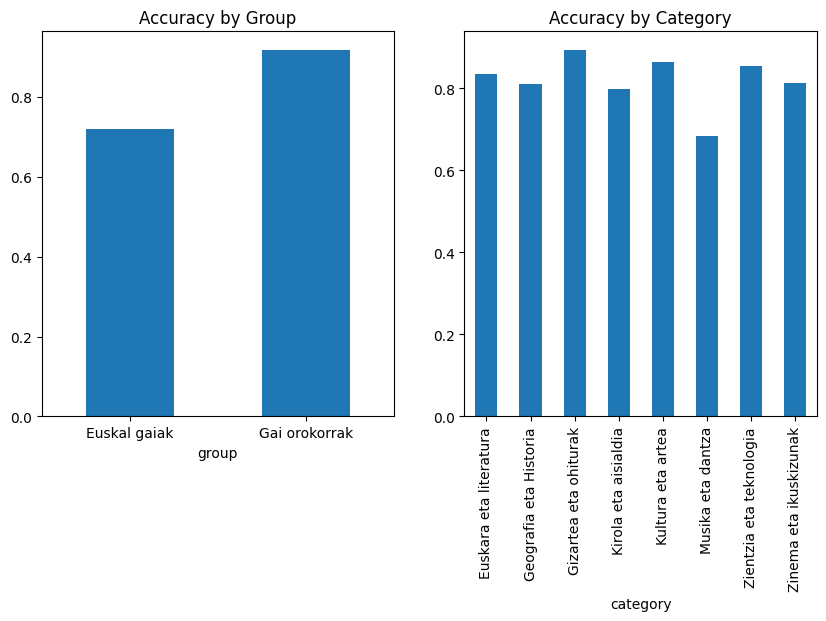

In [4]:
plot_dataframe_bertaqa(df_claude3opus_bertaqa_en)

81.16

group
Euskal gaiak     71.32
Gai orokorrak    90.89
Name: acc, dtype: float64

category
Euskara eta literatura     0.847154
Geografia eta Historia     0.821667
Gizartea eta ohiturak      0.882453
Kirola eta aisialdia       0.801336
Kultura eta artea          0.867470
Musika eta dantza          0.670628
Zientzia eta teknologia    0.814626
Zinema eta ikuskizunak     0.787270
Name: acc, dtype: float64

difficulty
1    0.864176
2    0.800923
3    0.759162
Name: acc, dtype: float64

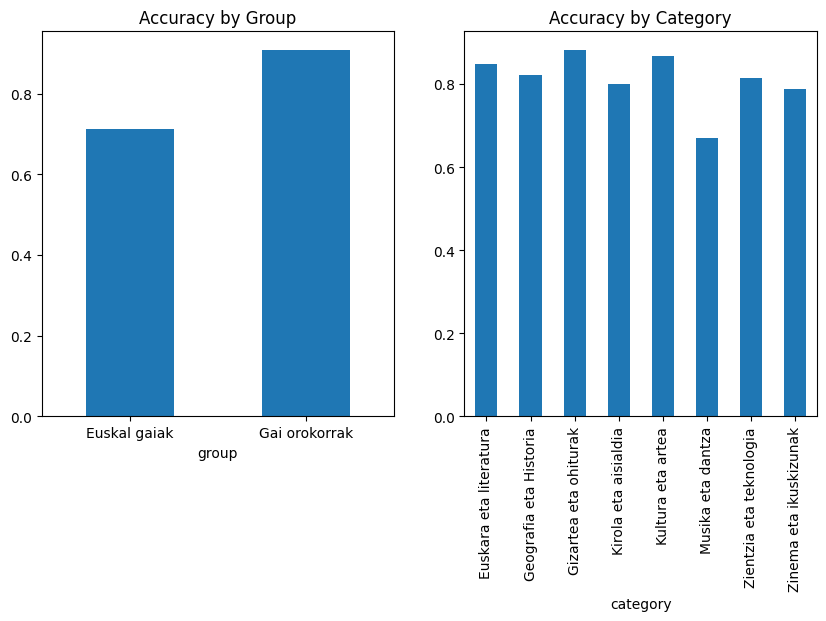

In [5]:
plot_dataframe_bertaqa(df_claude3opus_bertaqa_eu)

In [6]:
import matplotlib.pyplot as plt

def plot_eu_en_sizes(df_claude3haiku_bertaqa_eu, df_claude3haiku_bertaqa_en, df_claude3sonnet_bertaqa_eu, df_claude3sonnet_bertaqa_en, df_claude3opus_bertaqa_eu, df_claude3opus_bertaqa_en):
    merged = pd.DataFrame()
    merged["M=Claude-3 Haiku D=EU"] = df_claude3haiku_bertaqa_eu.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=Claude-3 Haiku D=EN"] = df_claude3haiku_bertaqa_en.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=Claude-3 Sonnet D=EU"] = df_claude3sonnet_bertaqa_eu.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=Claude-3 Sonnet D=EN"] = df_claude3sonnet_bertaqa_en.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=Claude-3 Opus D=EU"] = df_claude3opus_bertaqa_eu.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=Claude-3 Opus D=EN"] = df_claude3opus_bertaqa_en.apply(lambda x: 1 if x["correct"] else 0, axis=1)

    merged["group"] = df_claude3haiku_bertaqa_eu["group"]
    merged["difficulty"] = df_claude3haiku_bertaqa_eu["difficulty"]
    merged["category"] = df_claude3haiku_bertaqa_eu["category"]

    merged_mean = merged.mean()
    display(pd.DataFrame((merged_mean * 100).round(2)))

    merged_grouped = merged.groupby("group").mean()
    merged_grouped_difficulty = merged.groupby("difficulty").mean()
    merged_grouped_category = merged.groupby("category").mean()
    # remove difficulty from merged_grouped and merged_grouped_category
    merged_grouped.drop("difficulty", axis=1, inplace=True)
    merged_grouped_category.drop("difficulty", axis=1, inplace=True)
    display((merged_grouped.T * 100).round(2))
    display((merged_grouped_category.T * 100).round(2))
    display((merged_grouped_difficulty.T * 100).round(2))

    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    merged_grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    #merged_grouped_difficulty.plot(kind="bar", ax=axs[2], rot=0, title="Accuracy by Difficulty")
    merged_grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")

    # add plot that combines group and category
    merged_group_category = merged.groupby(["category", "group"]).mean()
    merged_group_category.drop("difficulty", axis=1, inplace=True)
    display((merged_group_category.T * 100).round(2))
    merged_group_category.plot(kind="bar", rot=90, title="Accuracy by Category and Group")
    # make this plot bigger
    plt.gcf().set_size_inches(20, 6)

    # add plot that combines group and difficulty
    merged_group_difficulty = merged.groupby(["difficulty", "group"]).mean()
    display((merged_group_difficulty.T * 100).round(2))
    merged_group_difficulty.plot(kind="bar", rot=90, title="Accuracy by Group and Difficulty")

/tmp/ipykernel_2864886/4217573284.py:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_mean = merged.mean()


,0
M=Claude-3 Haiku D=EU,69.09
M=Claude-3 Haiku D=EN,71.51
M=Claude-3 Sonnet D=EU,69.76
M=Claude-3 Sonnet D=EN,72.46
M=Claude-3 Opus D=EU,81.16
M=Claude-3 Opus D=EN,81.94
difficulty,192.66


/tmp/ipykernel_2864886/4217573284.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_grouped = merged.groupby("group").mean()
/tmp/ipykernel_2864886/4217573284.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_grouped_difficulty = merged.groupby("difficulty").mean()
/tmp/ipykernel_2864886/4217573284.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_grouped_category = merged.groupby("catego

group,Euskal gaiak,Gai orokorrak
M=Claude-3 Haiku D=EU,58.21,79.85
M=Claude-3 Haiku D=EN,58.71,84.16
M=Claude-3 Sonnet D=EU,56.13,83.24
M=Claude-3 Sonnet D=EN,58.33,86.41
M=Claude-3 Opus D=EU,71.32,90.89
M=Claude-3 Opus D=EN,71.91,91.85


category,Euskara eta literatura,Geografia eta Historia,Gizartea eta ohiturak,Kirola eta aisialdia,Kultura eta artea,Musika eta dantza,Zientzia eta teknologia,Zinema eta ikuskizunak
M=Claude-3 Haiku D=EU,70.57,71.83,76.66,65.44,69.02,58.06,73.47,67.67
M=Claude-3 Haiku D=EN,72.36,73.83,78.36,68.95,70.40,60.27,78.06,69.85
M=Claude-3 Sonnet D=EU,70.08,72.67,75.30,68.28,71.26,57.72,76.53,66.33
M=Claude-3 Sonnet D=EN,69.92,74.00,78.71,71.79,74.87,58.23,80.27,72.03
M=Claude-3 Opus D=EU,84.72,82.17,88.25,80.13,86.75,67.06,81.46,78.73
M=Claude-3 Opus D=EN,83.41,81.00,89.44,79.97,86.40,68.42,85.54,81.41


difficulty,1,2,3
M=Claude-3 Haiku D=EU,77.28,68.44,59.61
M=Claude-3 Haiku D=EN,79.12,70.05,63.80
M=Claude-3 Sonnet D=EU,75.15,67.97,65.30
M=Claude-3 Sonnet D=EN,79.12,70.17,67.02
M=Claude-3 Opus D=EU,86.42,80.09,75.92
M=Claude-3 Opus D=EN,87.25,80.27,77.41


category               Euskara eta literatura                \
group                            Euskal gaiak Gai orokorrak   
M=Claude-3 Haiku D=EU                   63.93         77.10   
M=Claude-3 Haiku D=EN                   65.57         79.03   
M=Claude-3 Sonnet D=EU                  62.30         77.74   
M=Claude-3 Sonnet D=EN                  60.33         79.35   
M=Claude-3 Opus D=EU                    80.66         88.71   
M=Claude-3 Opus D=EN                    77.70         89.03   

category               Geografia eta Historia                \
group                            Euskal gaiak Gai orokorrak   
M=Claude-3 Haiku D=EU                   61.00         82.67   
M=Claude-3 Haiku D=EN                   62.00         85.67   
M=Claude-3 Sonnet D=EU                  56.33         89.00   
M=Claude-3 Sonnet D=EN                  62.33         85.67   
M=Claude-3 Opus D=EU                    72.33         92.00   
M=Claude-3 Opus D=EN                    69.33         92.67   

category               Gizartea eta ohiturak                \
group                           Euskal gaiak Gai orokorrak   
M=Claude-3 Haiku D=EU                  67.47         85.57   
M=Claude-3 Haiku D=EN                  67.47         88.93   
M=Claude-3 Sonnet D=EU                 65.05         85.23   
M=Claude-3 Sonnet D=EN                 66.78         90.27   
M=Claude-3 Opus D=EU                   84.08         92.28   
M=Claude-3 Opus D=EN                   85.47         93.29   

category               Kirola eta aisialdia               Kultura eta artea  \
group                          Euskal gaiak Gai orokorrak      Euskal gaiak   
M=Claude-3 Haiku D=EU                 50.68         79.87             57.63   
M=Claude-3 Haiku D=EN                 54.05         83.50             55.25   
M=Claude-3 Sonnet D=EU                52.70         83.50             55.93   
M=Claude-3 Sonnet D=EN                55.41         87.79             57.29   
M=Claude-3 Opus D=EU                  66.89         93.07             76.95   
M=Claude-3 Opus D=EN                  68.24         91.42             76.61   

category                             Musika eta dantza                \
group                  Gai orokorrak      Euskal gaiak Gai orokorrak   
M=Claude-3 Haiku D=EU          80.77             44.98         70.67   
M=Claude-3 Haiku D=EN          86.01             43.60         76.33   
M=Claude-3 Sonnet D=EU         87.06             40.48         74.33   
M=Claude-3 Sonnet D=EN         93.01             37.02         78.67   
M=Claude-3 Opus D=EU           96.85             49.83         83.67   
M=Claude-3 Opus D=EN           96.50             49.83         86.33   

category               Zientzia eta teknologia                \
group                             Euskal gaiak Gai orokorrak   
M=Claude-3 Haiku D=EU                    64.73         82.09   
M=Claude-3 Haiku D=EN                    69.18         86.82   
M=Claude-3 Sonnet D=EU                   66.10         86.82   
M=Claude-3 Sonnet D=EN                   70.89         89.53   
M=Claude-3 Opus D=EU                     73.97         88.85   
M=Claude-3 Opus D=EN                     79.79         91.22   

category               Zinema eta ikuskizunak                
group                            Euskal gaiak Gai orokorrak  
M=Claude-3 Haiku D=EU                   55.03         80.27  
M=Claude-3 Haiku D=EN                   52.35         87.29  
M=Claude-3 Sonnet D=EU                  50.00         82.61  
M=Claude-3 Sonnet D=EN                  56.38         87.63  
M=Claude-3 Opus D=EU                    65.44         91.97  
M=Claude-3 Opus D=EN                    68.12         94.65

/tmp/ipykernel_2864886/4217573284.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_group_difficulty = merged.groupby(["difficulty", "group"]).mean()


difficulty                        1                          2                \
group                  Euskal gaiak Gai orokorrak Euskal gaiak Gai orokorrak   
M=Claude-3 Haiku D=EU         67.03         87.40        56.00         80.66   
M=Claude-3 Haiku D=EN         66.31         91.76        57.28         82.61   
M=Claude-3 Sonnet D=EU        61.77         88.34        53.20         82.49   
M=Claude-3 Sonnet D=EN        66.31         91.76        54.37         85.70   
M=Claude-3 Opus D=EU          79.21         93.52        68.80         91.19   
M=Claude-3 Opus D=EN          79.33         95.05        69.03         91.30   

difficulty                        3                
group                  Euskal gaiak Gai orokorrak  
M=Claude-3 Haiku D=EU         50.00         69.21  
M=Claude-3 Haiku D=EN         51.05         76.53  
M=Claude-3 Sonnet D=EU        52.84         77.73  
M=Claude-3 Sonnet D=EN        53.44         80.57  
M=Claude-3 Opus D=EU          64.67         87.14  
M=Claude-3 Opus D=EN          66.32         88.49

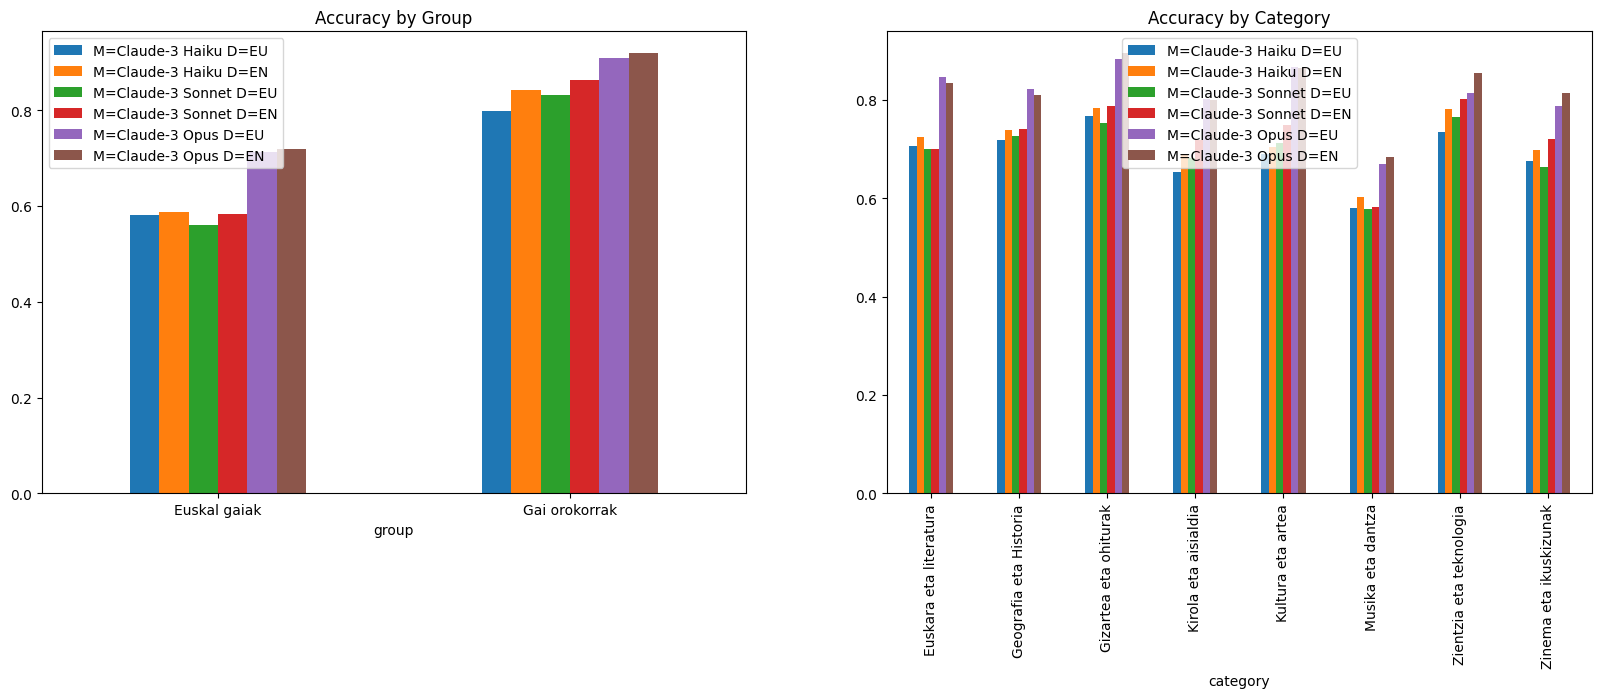

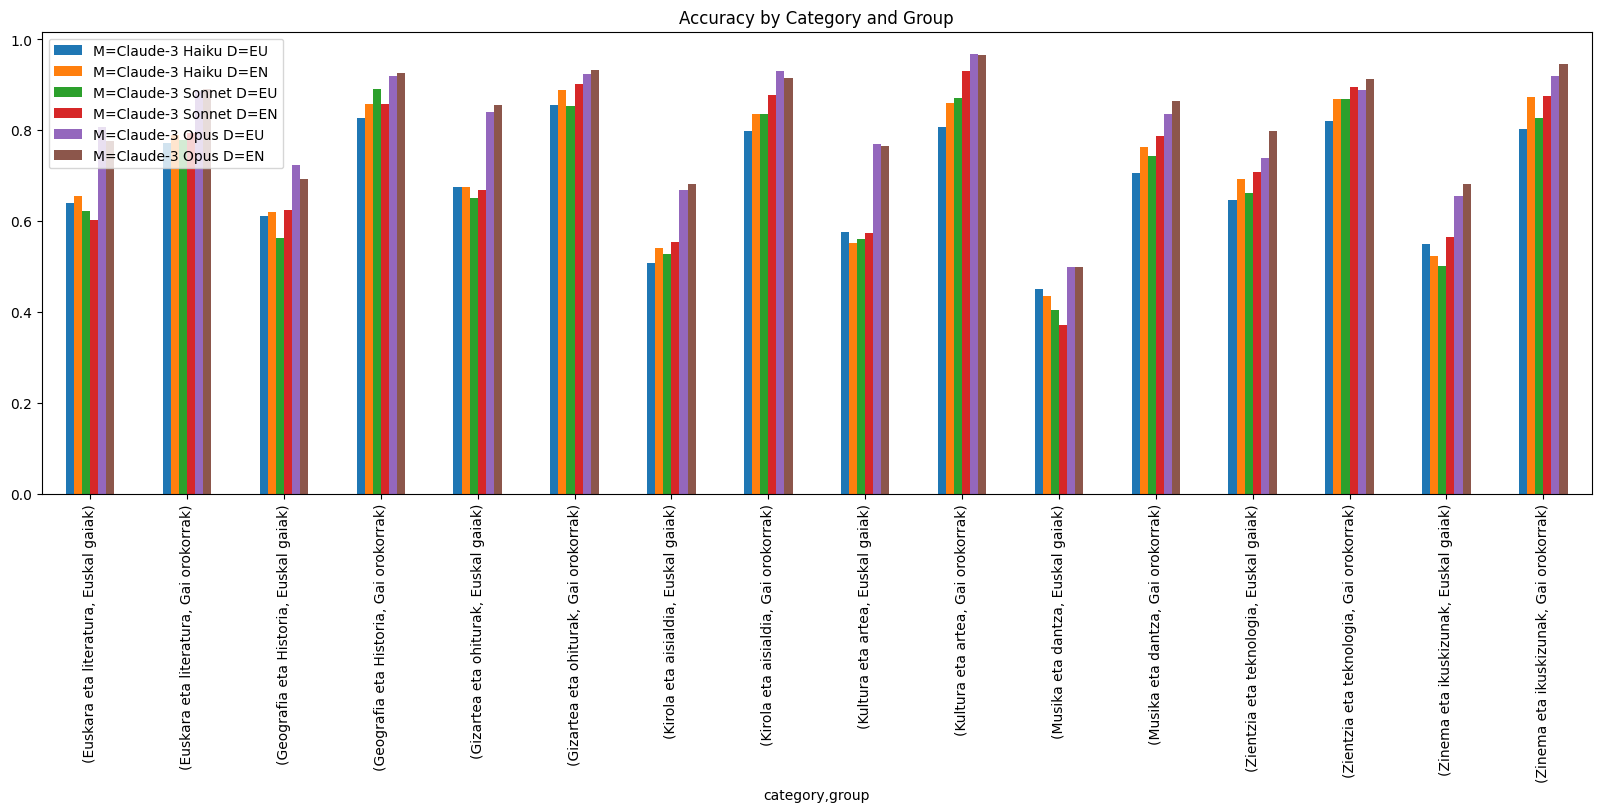

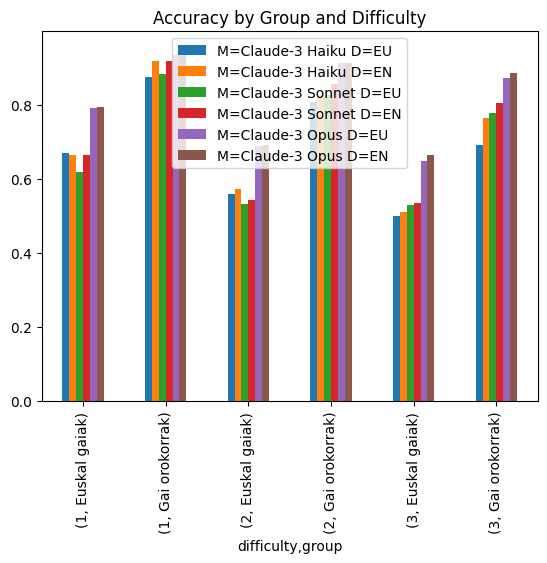

In [7]:
plot_eu_en_sizes(df_claude3haiku_bertaqa_eu, df_claude3haiku_bertaqa_en, df_claude3sonnet_bertaqa_eu, df_claude3sonnet_bertaqa_en, df_claude3opus_bertaqa_eu, df_claude3opus_bertaqa_en)